# Lecture 6- First look at SUSY Data


### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [9]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [10]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [11]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [12]:
FeatureNames

['M_TR_2',
 'S_R',
 'axial_MET',
 'cos_theta_r1',
 'dPhi_r_b',
 'R',
 'MET_rel',
 'M_Delta_R',
 'MT2',
 'M_R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
!ls -lh

total 416K
-rw-r--r-- 1 monicatnm monicatnm 414K Mar  8 16:05 Lecture.6.ipynb


In [19]:
!head -500000 /home/monicatnm/SUSY.csv > /home/monicatnm/SUSY-small.csv

In [20]:
!ls -lh

total 416K
-rw-r--r-- 1 monicatnm monicatnm 374K Mar  8 17:09 Lecture.6.ipynb
-rw-r--r-- 1 monicatnm monicatnm    0 Mar  8 17:08 SUSY-small.csv


Now we can read the data into a pandas dataframe:

In [21]:
filename="/home/monicatnm/SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [22]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [23]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


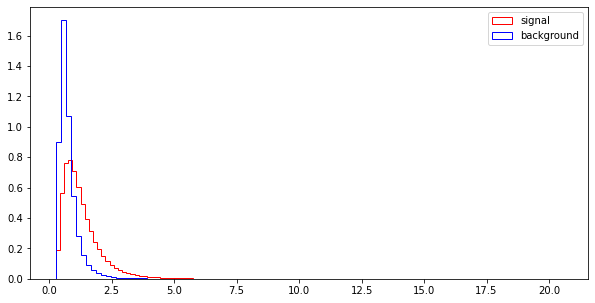

l_1_eta


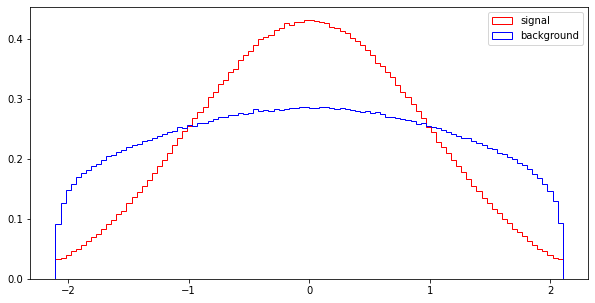

l_1_phi


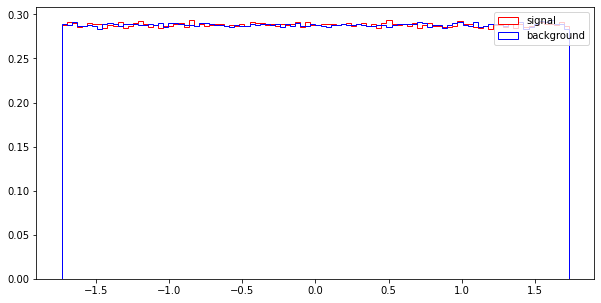

l_2_pT


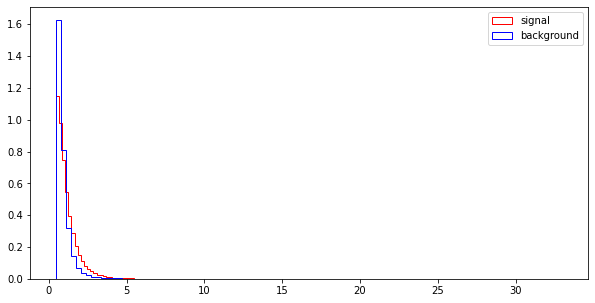

l_2_eta


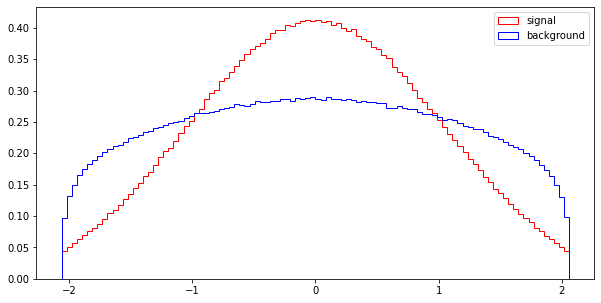

l_2_phi


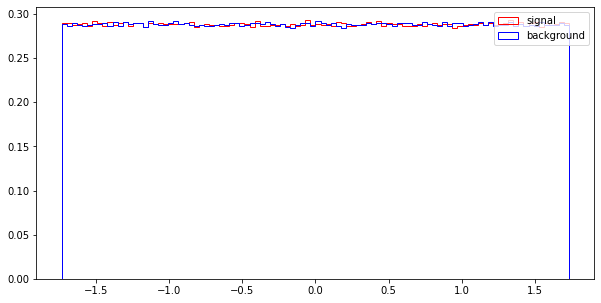

MET


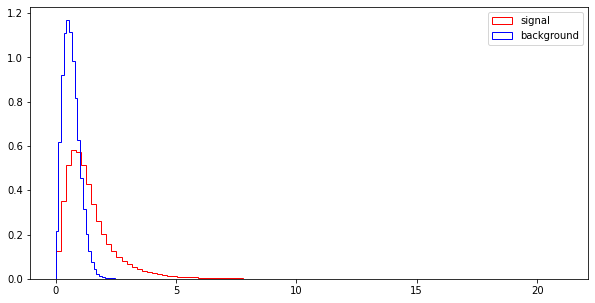

MET_phi


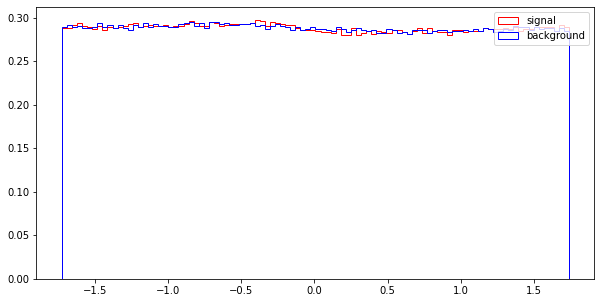

MET_rel


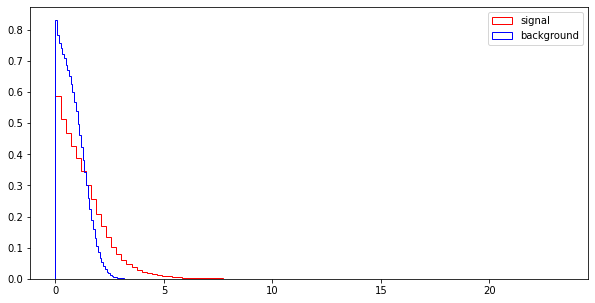

axial_MET


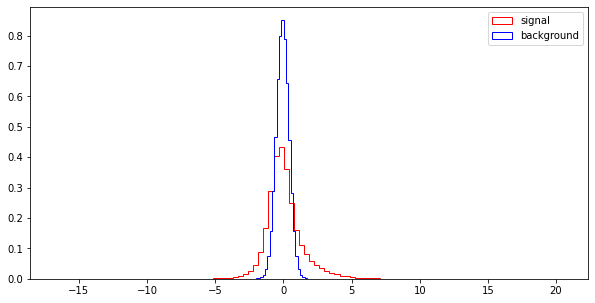

M_R


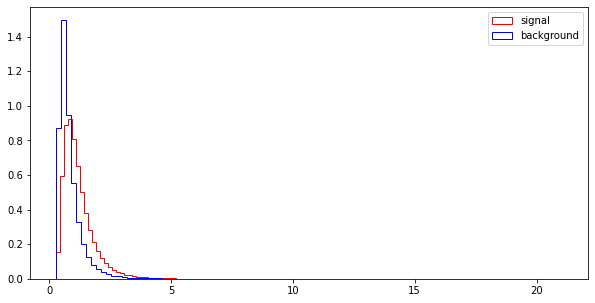

M_TR_2


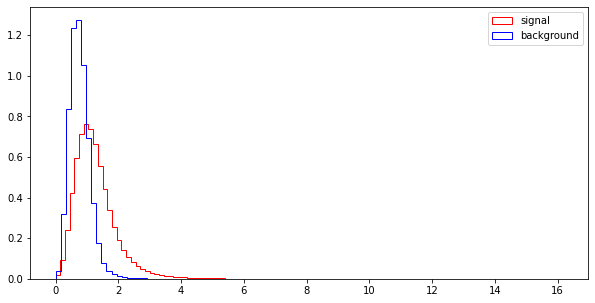

R


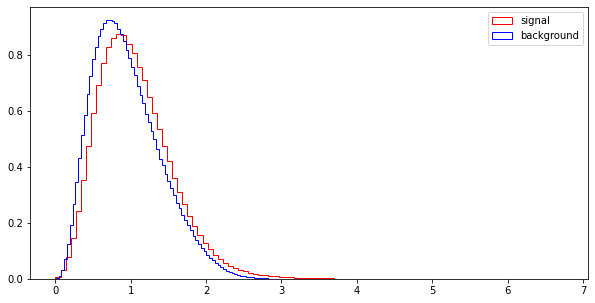

MT2


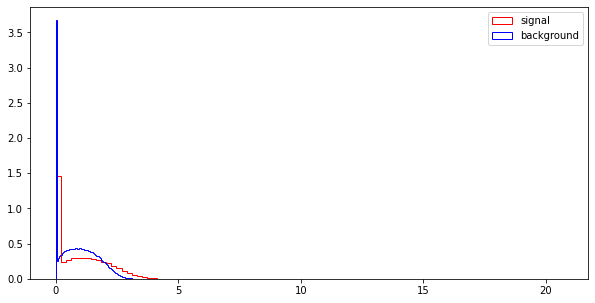

S_R


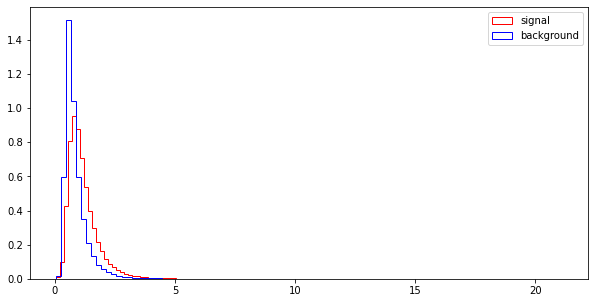

M_Delta_R


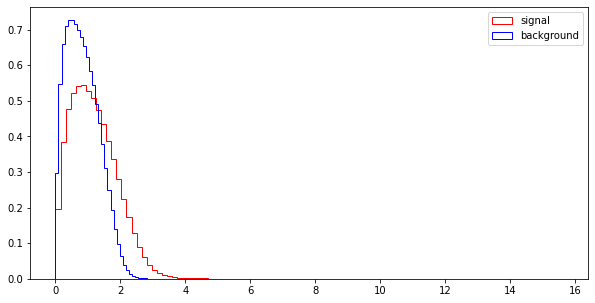

dPhi_r_b


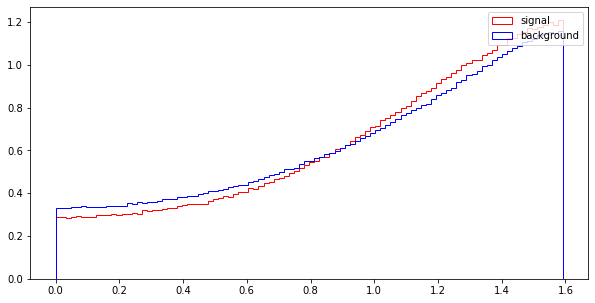

cos_theta_r1


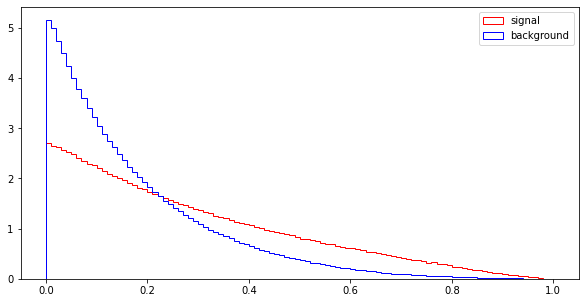

In [24]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=True, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=True, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

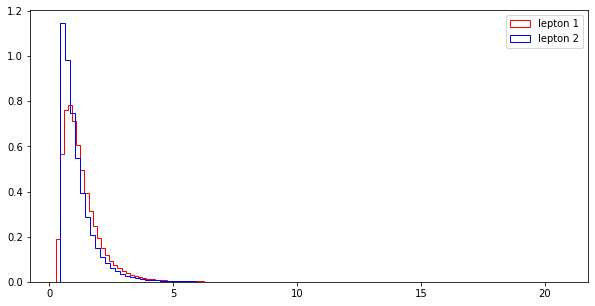

In [25]:
plt.figure(figsize=(10,5))
plt.hist(np.array(df_sig["l_1_pT"]),bins=100,histtype="step", color="red",label="lepton 1",density=True, stacked=True)
plt.hist(np.array(df_sig["l_2_pT"]),bins=100,histtype="step", color="blue", label="lepton 2",density=True, stacked=True)
plt.legend(loc='upper right')
plt.show()

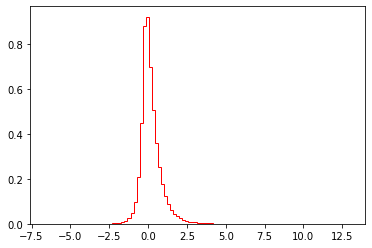

In [26]:
_=plt.hist(np.array(df_sig["l_1_pT"])-np.array(df_sig["l_2_pT"]),bins=100,histtype="step", color="red",label="lepton 1",density=True, stacked=True)

## Closer Look

Lets take a closer look at what the density option is doing:

2287827.0

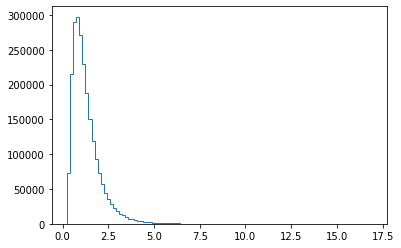

In [27]:
# density = False
counts,bin_edges_0,_=plt.hist(np.array(df_sig["l_1_pT"]),bins=100,histtype="step",density=False)
sum(counts)

6.01020748072837

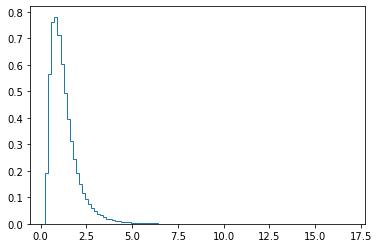

In [28]:
# density = True
densities,bin_edges_1,_=plt.hist(np.array(df_sig["l_1_pT"]),bins=100,histtype="step",density=True)
sum(densities)

From the [`matplotlib` histogram documentation](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for the denisty option:

If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (`density = counts / (sum(counts) * np.diff(bins))`), so that the area under the histogram integrates to 1 (`np.sum(density * np.diff(bins)) == 1`).

If stacked is also True, the sum of the histograms is normalized to 1.

Lets check:

In [29]:
densities_0 = counts / (sum(counts) * (bin_edges_0[1] - bin_edges_0[0]))

In [30]:
list(zip(densities,densities_0,densities == densities_0))

[(0.18998210292618903, 0.18998210292618906, False),
 (0.5651362029894433, 0.5651362029894433, True),
 (0.7608925344926363, 0.7608925344926363, True),
 (0.7816251149884116, 0.7816251149884116, True),
 (0.7119455705041305, 0.7119455705041305, True),
 (0.6044629553997015, 0.6044629553997015, True),
 (0.49332087696143884, 0.49332087696143884, True),
 (0.39482535738109087, 0.39482535738109087, True),
 (0.31244408624994285, 0.31244408624994285, True),
 (0.24512362150276346, 0.24512362150276346, True),
 (0.19284294683899966, 0.1928429468389994, False),
 (0.15062908014023912, 0.15062908014023932, False),
 (0.11786204054016235, 0.1178620405401625, False),
 (0.09328610408071271, 0.09328610408071258, False),
 (0.07399051313526538, 0.07399051313526528, False),
 (0.05917927532036636, 0.059179275320366445, False),
 (0.04777530523266226, 0.047775305232662324, False),
 (0.037879254709653525, 0.03787925470965347, False),
 (0.0314246234022384, 0.03142462340223835, False),
 (0.02516701991250987, 0.025167

## Had do I "add" histograms

What if we wanted to plot the $p_T$ distributions of all leptons? 

### "Easy way"
Recall in Data 1401 we broke the process of making a histogram into two steps: calculating the histogram and drawing the histogram. One way to make a histogram of both "l_1_pT" and "l_2_pT" would be to compute two histograms, add them into one histogram combined, and then draw the histogram. Unfortunately, `matplotlib`'s histogram function does not separate the two steps, we cannot use it to sum the histograms. We can however combine the data that is fed into the histogram. For example:


In [31]:
lepton_pTs = df_sig["l_1_pT"].tolist() + df_sig["l_2_pT"].tolist()
lepton_pTs

[1.6679730415344238,
 0.4448399245738983,
 0.38125607371330256,
 1.309996485710144,
 2.1128118038177486,
 0.7982016205787658,
 0.45221361517906183,
 1.006097674369812,
 0.8378669023513795,
 1.6415950059890747,
 1.3614416122436523,
 3.410472154617309,
 1.4270050525665283,
 1.0238685607910156,
 1.1843819618225095,
 1.8734096288681032,
 0.978762149810791,
 0.8137968182563781,
 1.7476295232772827,
 0.5861909985542296,
 3.7457878589630127,
 1.1837544441223145,
 0.36006826162338257,
 0.48394632339477534,
 0.6222661733627319,
 2.751947402954101,
 0.7143032550811768,
 1.000693440437317,
 0.8545339703559875,
 0.6255188584327698,
 1.1066950559616089,
 0.8030112981796264,
 3.491350650787353,
 1.3309385776519775,
 1.4885329008102417,
 1.2794935703277588,
 0.7803403735160828,
 2.6494648456573486,
 3.569708585739136,
 2.464473962783813,
 0.5770770311355591,
 0.7343797087669373,
 1.1515989303588867,
 0.8964004516601561,
 0.8659878969192506,
 2.778974771499634,
 1.9962869882583616,
 1.0563485622406004

Note that we added two python lists. What would have happened if we added numpy arrays instead?

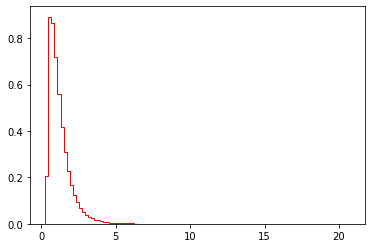

In [32]:
hist, bin_edges, _ =plt.hist(lepton_pTs,
                             bins=100,histtype="step", color="red",label="signal",density=True, stacked=True)

In [33]:
lepton_pTs_wrong = np.array(df_sig["l_1_pT"].tolist()) + np.array(df_sig["l_2_pT"].tolist())
lepton_pTs_wrong.tolist()

[2.1740752458572388,
 0.8965588510036469,
 0.8302149176597594,
 2.8992791175842285,
 2.9180648922920223,
 1.3293482065200803,
 0.907759815454483,
 2.627584218978882,
 1.4544928669929504,
 2.386436700820923,
 2.409310817718506,
 5.608325481414795,
 2.2690650820732117,
 2.594031810760498,
 2.69096040725708,
 3.266999840736389,
 1.9861985445022583,
 1.763352632522583,
 2.399678111076355,
 1.5271686911582945,
 4.418241441249847,
 1.7512644529342651,
 0.8268069624900818,
 0.9414211809635161,
 1.4514793753623962,
 4.287120938301086,
 1.8772478103637695,
 2.2613362073898315,
 1.46551114320755,
 1.1109781861305237,
 2.607969641685486,
 1.4958806037902832,
 5.330781698226929,
 2.228787660598755,
 3.319098711013794,
 2.8375000953674316,
 1.2490077018737793,
 5.716747522354126,
 4.909423351287842,
 4.8569910526275635,
 1.4540668725967407,
 1.510608971118927,
 2.162020444869995,
 1.9586186408996582,
 1.5104462504386902,
 5.334547281265259,
 5.1483012437820435,
 1.4904847443103788,
 1.4739307761192

### "Hard way"
Now lets do the same task by adding two computed histograms and then plotting. We'll use numpy to compute the histogram.

In [80]:
c1,b1 = np.histogram(np.array(df_sig["l_1_pT"]),bins=100)
c2,b2 = np.histogram(np.array(df_sig["l_2_pT"]),bins=b1)

c= c1 + c2
c

array([ 72318, 636780, 689676, 624397, 527289, 428142, 338599, 266071,
       208154, 161626, 126831,  98458,  77331,  61028,  48308,  38453,
        30931,  24602,  20297,  16326,  13254,  10981,   8957,   7396,
         6137,   5141,   4192,   3561,   2869,   2545,   2118,   1824,
         1574,   1319,   1107,    963,    760,    705,    582,    506,
          422,    354,    335,    294,    293,    212,    209,    139,
          127,    137,    116,    110,     88,     83,     68,     68,
           49,     50,     40,     34,     37,     32,     25,     16,
           26,     15,     21,     11,     10,     15,     13,     13,
            6,      8,      9,      8,      6,      8,      4,      3,
            2,      4,      1,      1,      1,      5,      2,      3,
            0,      2,      0,      0,      3,      0,      1,      1,
            0,      0,      1,      1])

To plot the histogram, we'll have to use the `matplotlib`'s bar step:

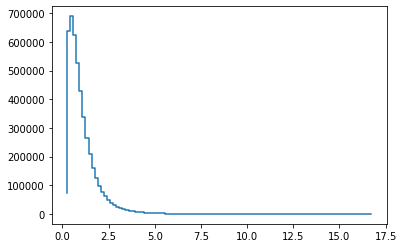

In [82]:
plt.step(b1[:-1],c)

We may worry that the bins are not drawn in the right place. We are providing the left edge of each bin. Looking at [the documentation for step](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.step.html), we see that it has an optional arguement `where` that defaults to `pre`, which is what we want.

For fun, we could try to draw the histrogram with `bar`, but it's not great:

<BarContainer object of 100 artists>

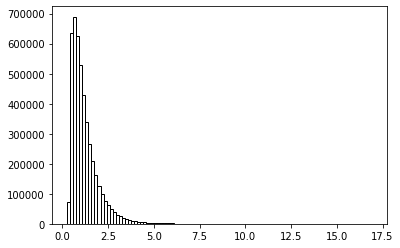

In [83]:
plt.bar(b1[:-1],
        c,
        align='edge',
        color="red",
        fill=False,
        width=b1[1]-b1[0]
       )

# Normalization

The data we are using are simulated. When producing the simulation, we tell the simulation how many signal and background events to make. How much signal or background is in the data coming the accelerators is determined by nature. 

Lets see how many signal background events we have:

In [ ]:
print("n_signal:", df_sig.shape)
print("n_backgroud:" , df_bkg.shape)

n_sig_sim= df_sig.shape[0]
n_bkg_sim=  df_bkg.shape[1]

The signal to background ratio in this simulated sample is no where close to the ratio we may expect in data. If SUSY was real, this many event candidates might correspond to years of data collection, while the background would be more like perhaps days. 

Let's say a computation has told us that in a years worth of data we would expect 10 signal and 100 background events. How do we create a histogram mimics what we would have seen in data? 


## Events

A simple way would be to just take a subset of the available data:

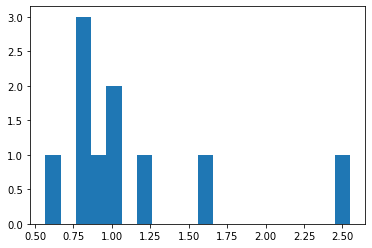

In [69]:
c_s,b,_=plt.hist(df_sig[:10]["M_TR_2"],bins=20)

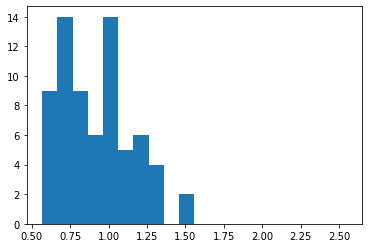

In [70]:
_=plt.hist(df_bkg[:100]["M_TR_2"],bins=b)

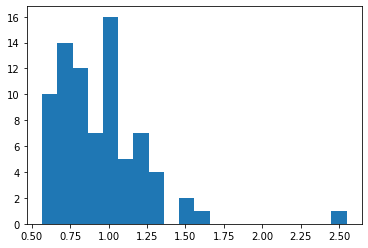

In [84]:
# Add them up
_=plt.hist(df_sig[:10]["M_TR_2"].tolist()+df_bkg[:100]["M_TR_2"].tolist(),bins=b)

## Error Bars

We need error bars on counts.

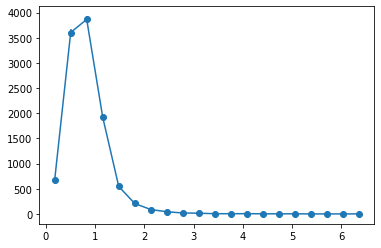

In [85]:
import math
n_bkg_expected = 10000
n_sig_expected = 1000

data = df_sig[:n_sig_expected]["M_TR_2"].tolist()+df_bkg[:n_bkg_expected]["M_TR_2"].tolist()

c , bin_edges= np.histogram(data,bins=20)
bin_width = bin_edges[1]-bin_edges[0]
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
error    = np.sqrt(c)

plt.errorbar(bin_centers, c, yerr=error, marker="o")
plt.show()

## Probability Distribution

Now let's that the plot that we just made came from the accelerator. How could we visually tell of there is a hint of SUSY in the data? We saw earlier that the $M_{TR_2}$ distribution is significantly different for signal and backgroud. If we super impose the distributions on the data, it may help guide the eye.

Here's what we will attempt to do:

* Create high resolution histograms (large number of events and bins) of:
    * Background only
    * Signal only
* Normalize the number the counts so they correspond to expected number of signal and background.
* Create new histogram corresponding to signal + background hypothesis
* Plot it all together.

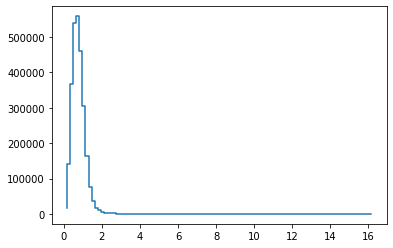

In [86]:
c_bkg_sim, sim_bin = np.histogram(df_bkg["M_TR_2"],bins=100)
plt.step(sim_bin[1:],c_bkg_sim)

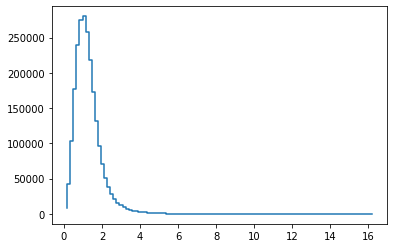

In [87]:
c_sig_sim, sim_bin = np.histogram(df_sig["M_TR_2"],bins=sim_bin)
plt.step(sim_bin[1:],c_sig_sim)

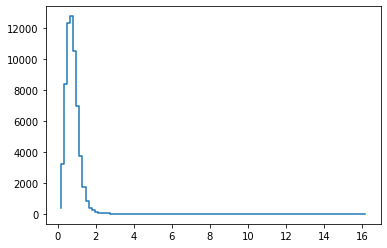

In [88]:
bin_size_sim = sim_bin[1]-sim_bin[0]
integral = sum(c_bkg_sim) * bin_size_sim
c_bkg_sim_normalized = (n_bkg_expected / integral ) * c_bkg_sim
plt.step(sim_bin[1:],c_bkg_sim_normalized)

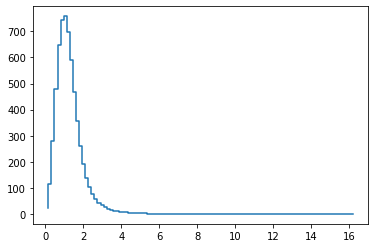

In [89]:
integral = sum(c_sig_sim) * bin_size_sim
c_sig_sim_normalized = (n_sig_expected / integral ) * c_sig_sim
plt.step(sim_bin[1:],c_sig_sim_normalized)

In [90]:
sum(c_sig_sim_normalized) * bin_size_sim

1000.0000000000005

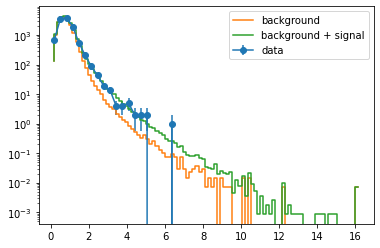

In [91]:
plt.errorbar(bin_centers, c, yerr=error, marker="o",label="data")
plt.yscale("log")
plt.step(sim_bin[1:],c_bkg_sim_normalized*bin_width,label="background")
plt.step(sim_bin[1:],(c_bkg_sim_normalized+c_sig_sim_normalized)*bin_width,label="background + signal")
plt.legend()
plt.show()